In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/home/yusuf/Masaüstü/Machine-learning/data/bank-additional-full.csv',sep=';')

In [3]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [4]:
df.drop(["month","day_of_week"],axis=1,inplace=True)

In [5]:
df.shape

(41188, 19)

In [6]:
df.education.value_counts()

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

In [7]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories=[[
    'illiterate', 'unknown', 'basic.4y', 'basic.6y', 'basic.9y',
    'high.school', 'professional.course', 'university.degree'
]])

df['education_encoded'] = encoder.fit_transform(df[['education']])


In [8]:
df.education_encoded.value_counts()

education_encoded
7.0    12168
5.0     9515
4.0     6045
6.0     5243
2.0     4176
3.0     2292
1.0     1731
0.0       18
Name: count, dtype: int64

In [9]:
df.drop(['education'],axis=1,inplace=True)

In [10]:
df = df[df['job'] != 'unknown']


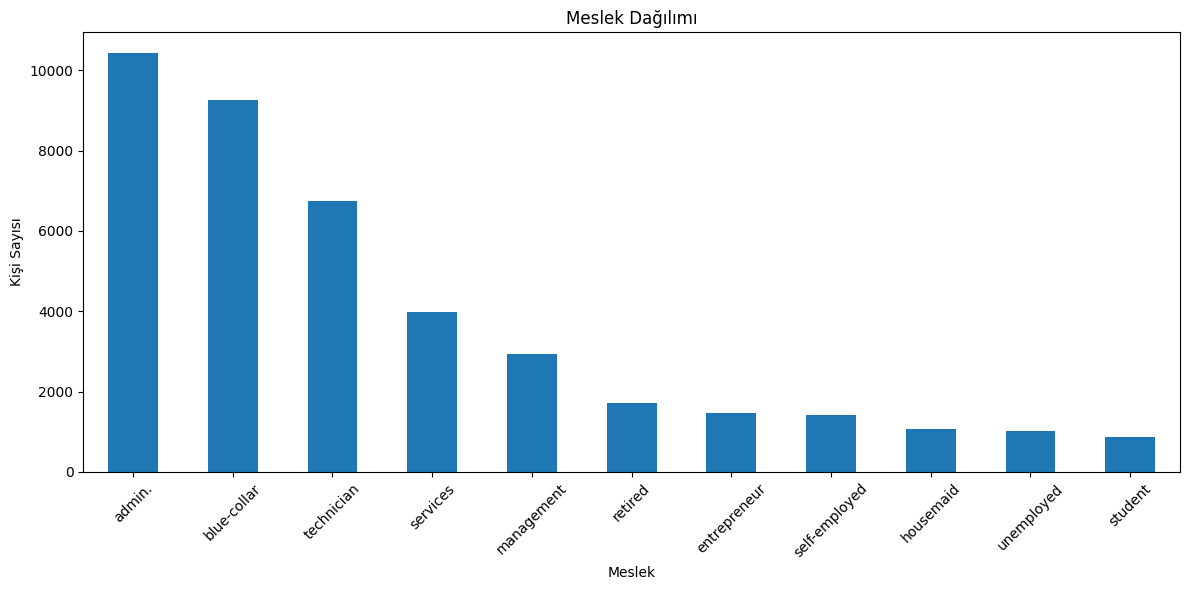

In [11]:
import matplotlib.pyplot as plt

df['job'].value_counts().plot(kind='bar', figsize=(12,6))
plt.title('Meslek Dağılımı')
plt.xlabel('Meslek')
plt.ylabel('Kişi Sayısı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


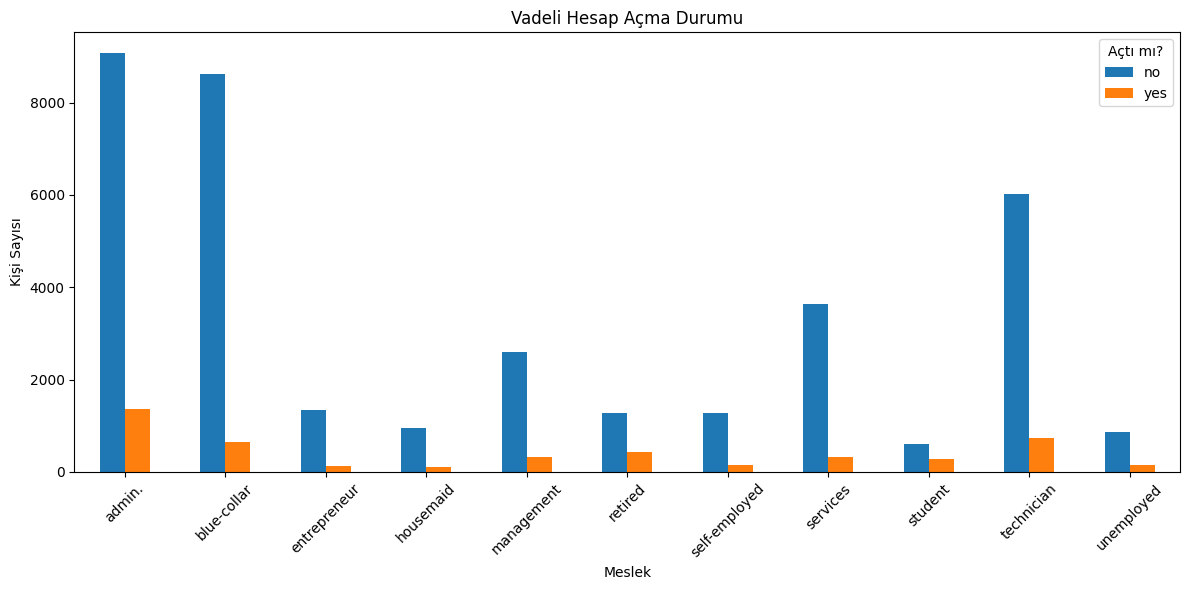

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

job_y_counts = df.groupby(['job', 'y']).size().unstack(fill_value=0)

job_y_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Vadeli Hesap Açma Durumu')
plt.xlabel('Meslek')
plt.ylabel('Kişi Sayısı')
plt.xticks(rotation=45)
plt.legend(title='Açtı mı?')
plt.tight_layout()
plt.show()


In [13]:
df = df[df['marital']!='unknown']

In [14]:
df.marital.value_counts()

marital
married     24694
single      11494
divorced     4599
Name: count, dtype: int64

<Axes: xlabel='marital'>

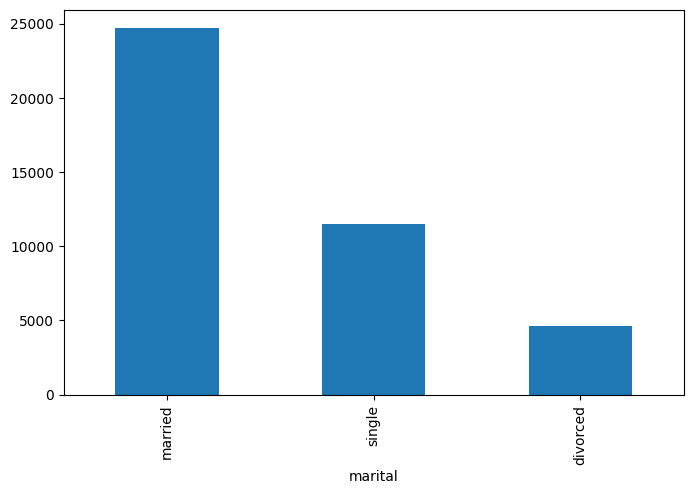

In [15]:
df['marital'].value_counts().plot(kind='bar', figsize=(8,5))

In [16]:
df = pd.get_dummies(df, columns=['marital'], prefix='marital')


In [36]:
df.columns

Index(['age', 'job', 'default', 'housing', 'loan', 'contact', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'education_encoded', 'marital_divorced', 'marital_married',
       'marital_single'],
      dtype='object')

In [17]:
df = df[df['housing']!='unknown']

<Axes: xlabel='housing'>

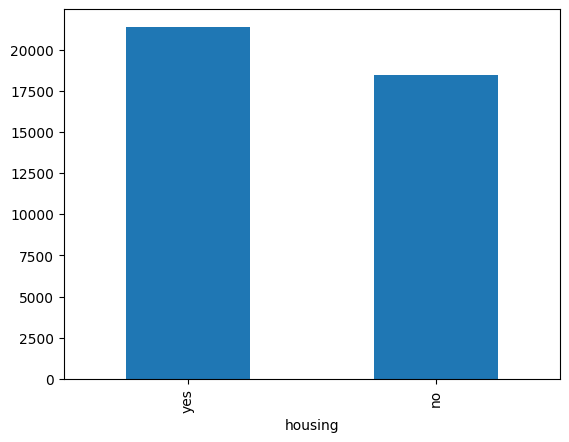

In [18]:
df.housing.value_counts().plot(kind='bar')

In [19]:
df['housing_encoded'] = df['housing'].apply(lambda x: 1 if x=='yes' else 0)

In [20]:
df.housing_encoded.value_counts()

housing_encoded
1    21376
0    18427
Name: count, dtype: int64

In [21]:
df.drop(['housing'],axis=1,inplace=True)

In [22]:
df.loan.value_counts()

loan
no     33620
yes     6183
Name: count, dtype: int64

In [23]:
df['loan_encoded'] = df['loan'].apply(lambda x: 1 if x=='yes' else 0)

df.drop(['loan'],axis=1,inplace=True)

In [24]:
df.default.value_counts()

df.drop(['default'],axis=1,inplace=True)

In [25]:
df.campaign.value_counts()

campaign
1     17040
2     10225
3      5159
4      2563
5      1558
6       947
7       607
8       385
9       268
10      214
11      175
12      119
13       86
14       66
17       56
16       48
15       47
18       31
20       30
19       25
21       22
22       17
23       16
24       15
27       11
29       10
28        8
25        8
26        8
30        7
31        7
35        5
33        4
32        4
34        3
40        2
42        2
43        2
39        1
37        1
41        1
Name: count, dtype: int64

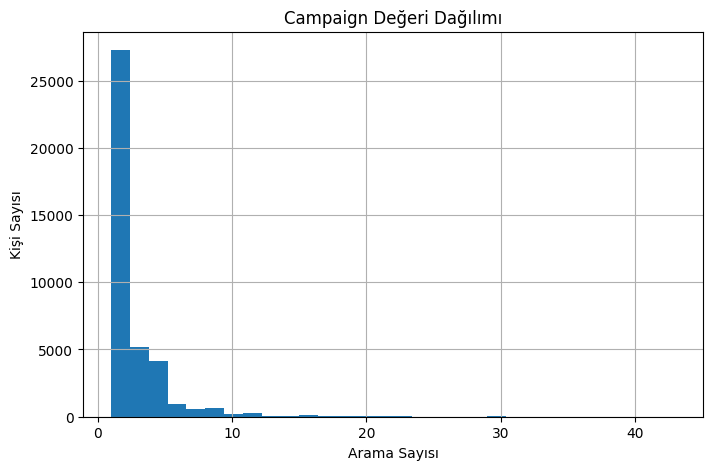

In [26]:
import matplotlib.pyplot as plt

df['campaign'].hist(bins=30, figsize=(8,5))
plt.title('Campaign Değeri Dağılımı')
plt.xlabel('Arama Sayısı')
plt.ylabel('Kişi Sayısı')
plt.show()


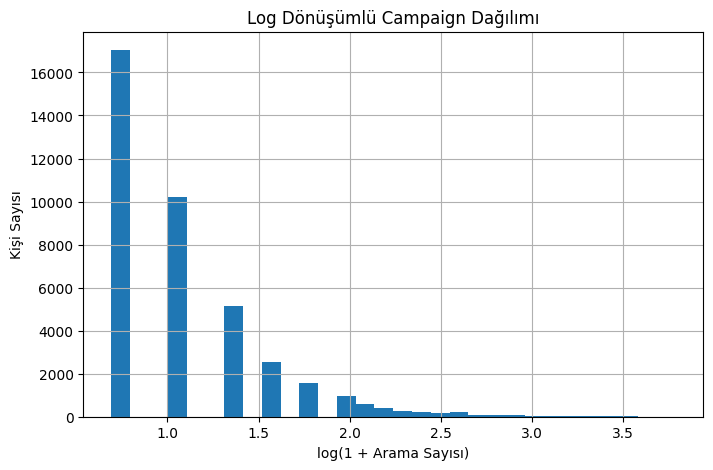

In [27]:
import numpy as np
df['campaign_log'] = np.log1p(df['campaign'])  # log(1 + x)
df['campaign_log'].hist(bins=30, figsize=(8,5))
df.drop('campaign',axis=1,inplace=True)
plt.title('Log Dönüşümlü Campaign Dağılımı')
plt.xlabel('log(1 + Arama Sayısı)')
plt.ylabel('Kişi Sayısı')
plt.show()



In [28]:
df.age.value_counts()

age
31    1895
32    1779
33    1765
36    1734
35    1701
      ... 
91       2
89       2
95       1
94       1
87       1
Name: count, Length: 78, dtype: int64

<Axes: >

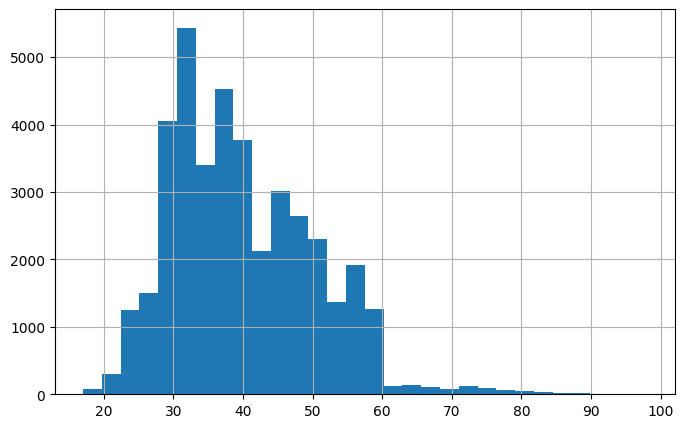

In [58]:
df['age'].hist(bins=30, figsize=(8,5))


In [29]:
df.pdays.value_counts()



pdays
999    38347
3        421
6        396
4        113
9         62
7         58
2         58
12        56
10        48
5         46
13        35
11        27
1         25
15        24
14        20
0         15
8         15
16        10
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: count, dtype: int64

In [30]:
df['was_contacted_before'] = df['pdays'].apply(lambda x: 0 if x == 999 else 1) # kategorik değere alınarak daha sistematik bir hale geitirikldi
df.drop('pdays',axis=1,inplace=True)

In [31]:
df.poutcome.value_counts()

poutcome
nonexistent    34372
failure         4110
success         1321
Name: count, dtype: int64

In [32]:
poutcome_map = {
    'failure': -1,
    'nonexistent': 0,
    'success': 1
}
df['poutcome_encoded'] = df['poutcome'].map(poutcome_map)
df.drop('poutcome',axis=1,inplace=True)


In [33]:
df.previous.value_counts()

previous
0    34372
1     4412
2      722
3      207
4       66
5       18
6        5
7        1
Name: count, dtype: int64

In [34]:
df['categorized_prev'] = df['previous'].apply(lambda x: 0 if x==0 else 1) 
df.drop('previous',axis=1, inplace=True)

In [35]:
df.categorized_prev.value_counts()

categorized_prev
0    34372
1     5431
Name: count, dtype: int64

In [37]:
df.duration.value_counts()


duration
85      167
90      166
87      159
136     159
124     158
       ... 
1326      1
1380      1
1804      1
1628      1
2184      1
Name: count, Length: 1532, dtype: int64

<Axes: >

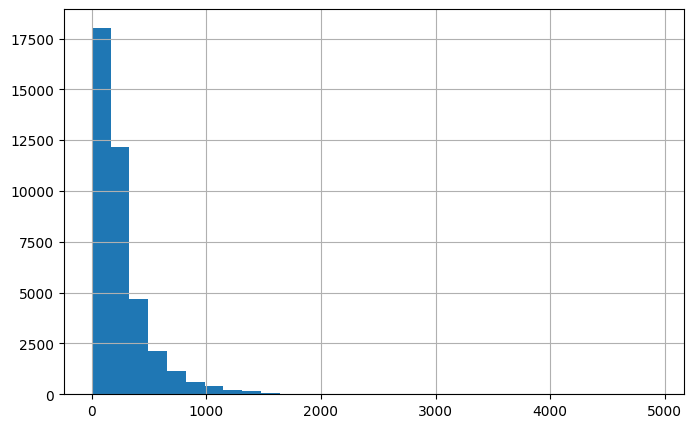

In [38]:
df['duration'].hist(bins=30, figsize=(8,5))


In [39]:
df['duration_minute'] = df['duration']/60

<Axes: >

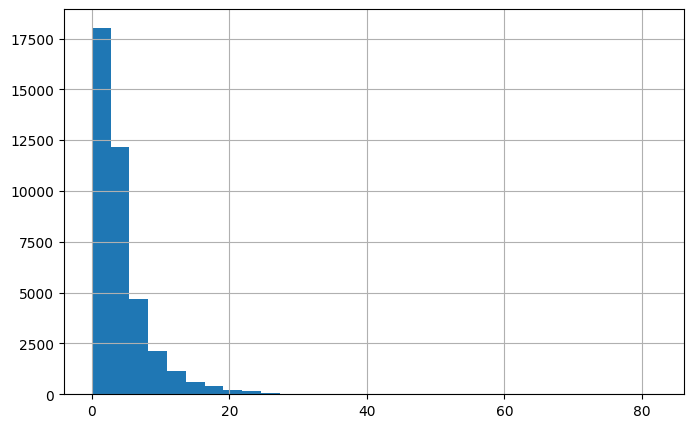

In [40]:
df['duration_minute'].hist(bins=30, figsize=(8,5))


<Axes: >

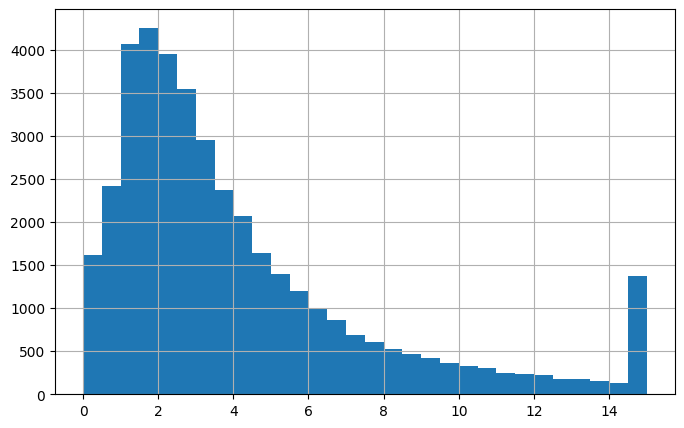

In [42]:
df['duration_minutes_capped'] = df['duration_minute'].apply(lambda x: x if x <= 15 else 15)
df['duration_minutes_capped'].hist(bins=30, figsize=(8,5))


In [43]:
df.drop(['duration','duration_minute'],axis=1,inplace=True)

In [ ]:
df.contact.value_counts()

contact
cellular     25369
telephone    14434
Name: count, dtype: int64

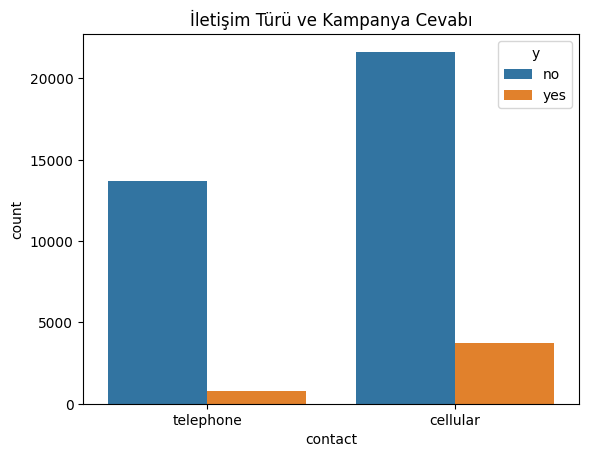

In [46]:
import seaborn as sns

sns.countplot(x='contact', hue='y', data=df)
plt.title('İletişim Türü ve Kampanya Cevabı')
plt.show()


In [47]:
pd.crosstab(df['contact'], df['y'], normalize='index') * 100


y,no,yes
contact,,
cellular,85.312783,14.687217
telephone,94.727726,5.272274


In [48]:
df = pd.get_dummies(df, columns=['contact'], prefix='contact')


In [50]:
df.shape
print(df.columns)

Index(['age', 'job', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'education_encoded',
       'marital_divorced', 'marital_married', 'marital_single',
       'housing_encoded', 'loan_encoded', 'campaign_log',
       'was_contacted_before', 'poutcome_encoded', 'categorized_prev',
       'duration_minutes_capped', 'contact_cellular', 'contact_telephone'],
      dtype='object')


<Axes: >

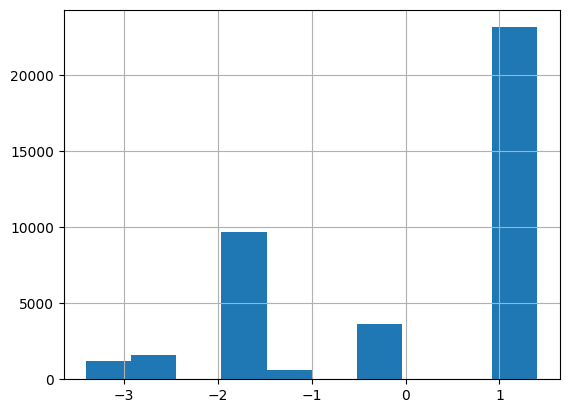

In [52]:
df['emp.var.rate'].hist()

<Axes: >

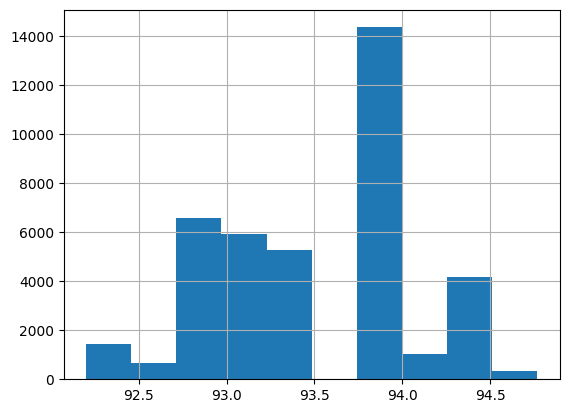

In [56]:
df['cons.price.idx'].hist()


<Axes: >

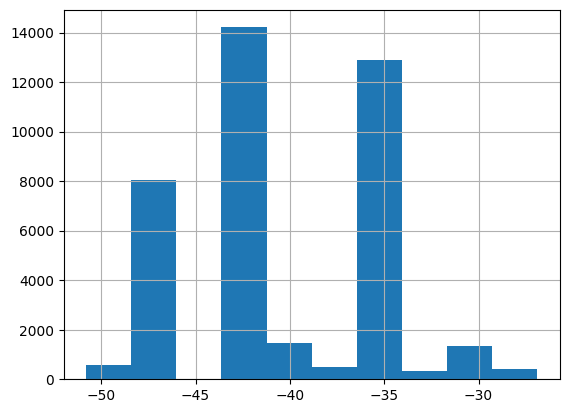

In [57]:
df['cons.conf.idx'].hist()

In [58]:
df.euribor3m.value_counts()

euribor3m
4.857    2765
4.962    2519
4.963    2412
4.961    1830
4.856    1144
         ... 
3.282       1
3.488       1
3.053       1
1.045       1
1.047       1
Name: count, Length: 316, dtype: int64

<Axes: >

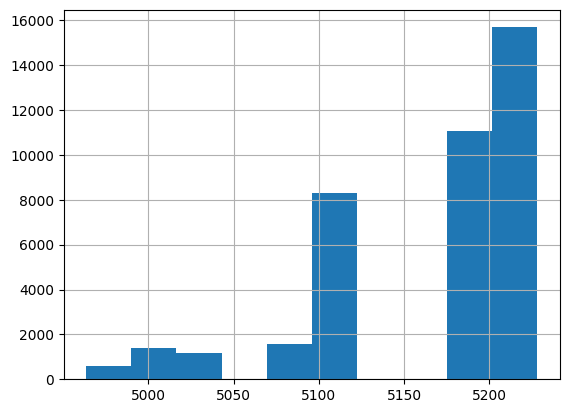

In [59]:
df['nr.employed'].hist()

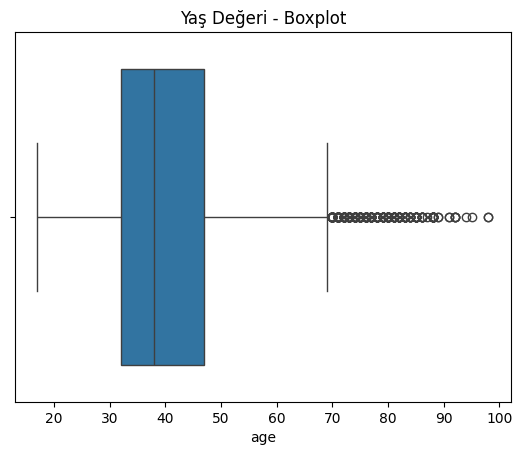

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['age'])
plt.title('Yaş Değeri - Boxplot')
plt.show()


In [ ]:
df = pd.get_dummies(df, columns=['job'], prefix='job')



In [73]:
df_filtered = pd.get_dummies(df_filtered, columns=['job'], prefix='job')


uç değerler için kısıtlama yapacağım


In [60]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [62]:
df_filtered = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]


**MODEL KULLANIMI**

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [76]:
#veristei oluşturma

df_filtered['y'].apply(lambda x: 1 if x=='yes' else 0)
df['y'].apply(lambda x: 1 if x=='yes' else 0)

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 39803, dtype: int64

In [87]:
X = df_filtered.drop('y',axis=1)
y = df_filtered.y

In [88]:
Scaler = StandardScaler()

In [89]:
X_filtered_scalar = Scaler.fit_transform(X)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_filtered_scalar,y, random_state=42,test_size=0.2)

In [91]:
lr = LogisticRegression()



In [92]:
lr.fit(X_train,y_train)

LogisticRegression()

In [93]:
accuracy_score(y_test,lr.predict(X_test))

0.9130876747141042

In [85]:
Scaler = StandardScaler()
lr = LogisticRegression()


In [94]:
#datastet olusturma
X = df.drop('y',axis=1)
y = df.y
X_scaled = Scaler.fit_transform(X,y)
X_train,X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.2,random_state=42)
lr.fit(X_train,y_train)
accuracy_score(y_test,lr.predict(X_test))


0.9099359376962693